In [1]:
# load libraries
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import loadtxt
from numpy import sort
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [2]:
props = pd.read_csv(r'/home/ankita/Desktop/working_file/dir_15_07_2020_ml/genome_analysis/1000+1000_res+sus_isoniazid.csv', chunksize=200,low_memory=False,sep=",",dtype="int8")

In [3]:
chunk_list = []  # append each chunk df here 

# Each chunk is in df format
for chunk in props:  
    # perform data filtering 
    #chunk_filter = do_preprocessing(chunk)
    
    # Once the data filtering is done, append the chunk to list
    #chunk_list.append(chunk_filter)
    chunk_list.append(chunk)
    
# concat the list into dataframe 
df_concat = pd.concat(chunk_list)

In [4]:
df_concat.info()
print(df_concat.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 1809959 entries, AAAAAAAAAAAAAAAAAAACC to label
dtypes: int8(1809959)
memory usage: 3.4 GB
(2000, 1809959)


In [5]:
#df_concat.info()
#print(df_concat.shape)
#print(row)
#print(df_concat.head())
X = df_concat.iloc[:,1 :-1].values
y = df_concat.iloc[:, -1].values

In [6]:
print(len(X))
print(len(y))

2000
2000


In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split as ttsplit
X_train, X_test, y_train, y_test = ttsplit(X, y, test_size = 0.2, random_state = 0)
X_train1, X_train2, y_train1, y_train2 = ttsplit (X_train, y_train, test_size =0.5, random_state=0)

In [8]:
print(len(X_train))
print(len(X_test))
print(len(X_train1))
print(len(y_train1))
print(len(X_train2))
print(len(y_train2))

1600
400
800
800
800
800


In [ ]:
#import xgboost as xgb
#X_train_1=xgb.DMatrix(X_train, label = y_train)
#y_train_1=xgb.DMatrix(y_train)
#y_test_1=xgb.DMatrix(X_test, label = y_test)

In [ ]:
#params = {'objective': 'reg:linear', 'verbose': False}

In [ ]:
# fit a ensemble.AdaBoostClassifier() model to the data
model = XGBClassifier(learning_rate = 0.01,
                      n_estimators=100,max_depth=3,gamma=1,
                      subsample=0.8,colsample_bytree=0.8,)
#model.fit(X_train,y_train)
model1 = model.fit(X_train1,y_train1)
model2 = model1.fit(X_train2,y_train2)
                      
print(); print(model1); print(model2)

In [13]:

# make predictions
#X_test_1=xgb.DMatrix(X_test, label= y_test)
expected_y  = y_test
predicted_y = model2.predict(X_test)
predictions = [round(value) for value in predicted_y ]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 60.36%



              precision    recall  f1-score   support

           0       0.55      1.00      0.71       135
           1       1.00      0.23      0.38       145

    accuracy                           0.60       280
   macro avg       0.77      0.62      0.54       280
weighted avg       0.78      0.60      0.54       280


[[135   0]
 [111  34]]


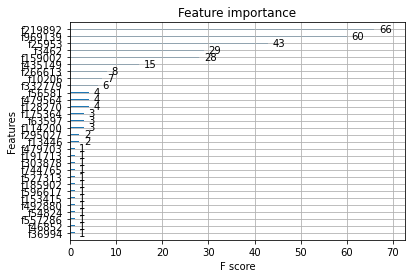

[0. 0. 0. ... 0. 0. 0.]


In [14]:
# summarize the fit of the model
#print(); print('XGBClassifier: ')
print(); print(metrics.classification_report(expected_y, predicted_y))
print(); print(metrics.confusion_matrix(expected_y, predicted_y))
plt.bar(range(len(model2.feature_importances_)), model2.feature_importances_)
plt.show()
plt.barh(range(len(model2.feature_importances_)), model2.feature_importances_)
plt.show()
plot_importance(model2);     plt.show()
imp_fea=model2.feature_importances_
print(imp_fea)

In [70]:
#k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies= cross_val_score(estimator = model,X = X_train, y=y_train, cv =10)
print(accuracies)
accuracies.mean()
#accuracies.std()

[0.64285714 0.64285714 0.64285714 0.65454545 0.65454545 0.65454545
 0.65454545 0.65454545 0.63636364 0.63636364]


0.6474025974025974

In [15]:
#from sklearn.feature_selection import SelectFromModel
#Define the function and place the components.
def plot_roc_curve(fper, tper):  
    plt.plot(fper, tper, color='green', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [16]:
#plot the ROC curve
probs = model.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
auc=metrics.auc(fper, tper)
plot_roc_curve(fper, tper)
print(auc)

0.6704980842911877


In [19]:
np.save('/home/ankita/Desktop/working_file/dir_15_07_2020_ml/genome_analysis/important_feature.npy',imp_fea)

In [18]:
print(len(imp_fea))

1622684
